In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset-1: Cats and Dogs Dataset

##### Dataset Download

In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2022-08-28 18:19:08--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.68.128, 74.125.24.128, 142.251.10.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.68.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   225MB/s    in 0.3s    

2022-08-28 18:19:09 (225 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



##### Exctraction

In [3]:
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

##### Normalization

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

##### Train - Test data directories

In [5]:
import os

base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [6]:
# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(224, 224),  # All images will be resized to 224x224
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

Found 2000 images belonging to 2 classes.


In [7]:
# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=20,
        class_mode='categorical')

Found 1000 images belonging to 2 classes.


In [8]:
train_cat_fnames = os.listdir(train_cats_dir)
print(train_cat_fnames[:10])

train_dog_fnames = os.listdir(train_dogs_dir)
train_dog_fnames.sort()
print(train_dog_fnames[:10])

['cat.930.jpg', 'cat.649.jpg', 'cat.458.jpg', 'cat.205.jpg', 'cat.78.jpg', 'cat.901.jpg', 'cat.303.jpg', 'cat.732.jpg', 'cat.593.jpg', 'cat.687.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']


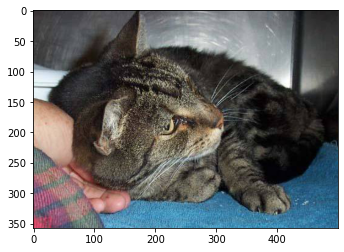

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.imshow(mpimg.imread(os.path.join(train_cats_dir, train_cat_fnames[0])))

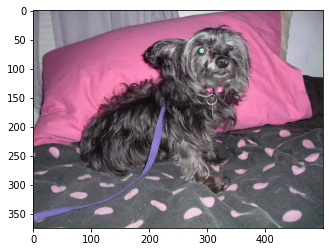

In [10]:
plt.imshow(mpimg.imread(os.path.join(train_dogs_dir, train_dog_fnames[0])))

### AlexNet Architecture

In [11]:
def AlexNet(classes):

  model = tf.keras.Sequential([
      tf.keras.Input(shape=(224,224,3), name = "ConvolutionInput"),
      tf.keras.layers.Conv2D(96, strides=4 ,kernel_size=(11,11), activation='relu', padding='valid', name = "ConvolutionLayer-1"),
      tf.keras.layers.MaxPooling2D(pool_size = (3,3), strides=(2,2),name = "PoolingLayer-1"),
      tf.keras.layers.BatchNormalization(name = "Norm-1"),
      tf.keras.layers.Conv2D(256, strides=1 ,kernel_size=(5,5), activation='relu', padding='same', name = "ConvolutionLayer-2"),
      tf.keras.layers.MaxPooling2D(pool_size = (3,3), strides=(2,2),name = "PoolingLayer-2"),
      tf.keras.layers.BatchNormalization(name = "Norm-2"),
      tf.keras.layers.Conv2D(384, strides=1 ,kernel_size=(3,3), activation='relu', padding='same', name = "ConvolutionLayer-3"),
      tf.keras.layers.Conv2D(384, strides=1 ,kernel_size=(3,3), activation='relu', padding='same', name = "ConvolutionLayer-4"),
      tf.keras.layers.Conv2D(256, strides=1 ,kernel_size=(3,3), activation='relu', padding='same', name = "ConvolutionLayer-5"),
      tf.keras.layers.MaxPooling2D(pool_size = (3,3), strides=2, name = "PoolingLayer-3"),
      tf.keras.layers.BatchNormalization(name = "Norm-3"),
      tf.keras.layers.Flatten(name = "NeuralNetInput"),
      tf.keras.layers.Dense(4096, activation='relu', name = "HiddenLayer-1"),
      tf.keras.layers.Dropout(rate = 0.5, name = "Dropout-1"),
      tf.keras.layers.Dense(4096, activation='relu', name = "HiddenLayer-2"),
      tf.keras.layers.Dropout(rate = 0.5, name = "Dropout-2"),
      tf.keras.layers.Dense(classes, activation='softmax', name = "OutputLayer")
    ])
  
  model.summary()
  model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate = 0.001), loss='categorical_crossentropy', metrics=['accuracy'])

  return model

In [12]:
alexnetModel = AlexNet(classes = 2)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 ConvolutionLayer-1 (Conv2D)  (None, 54, 54, 96)       34944     
                                                                 
 PoolingLayer-1 (MaxPooling2  (None, 26, 26, 96)       0         
 D)                                                              
                                                                 
 Norm-1 (BatchNormalization)  (None, 26, 26, 96)       384       
                                                                 
 ConvolutionLayer-2 (Conv2D)  (None, 26, 26, 256)      614656    
                                                                 
 PoolingLayer-2 (MaxPooling2  (None, 12, 12, 256)      0         
 D)                                                              
                                                                 
 Norm-2 (BatchNormalization)  (None, 12, 12, 256)      1

In [13]:
alexnetHistory = alexnetModel.fit(train_generator, epochs=5, validation_data=validation_generator, verbose=1)

Epoch 1/5
100/100 [==============================] - 18s 124ms/step - loss: 3.2783 - accuracy: 0.5220 - val_loss: 1.3096 - val_accuracy: 0.4890
Epoch 2/5
100/100 [==============================] - 10s 104ms/step - loss: 0.7817 - accuracy: 0.5700 - val_loss: 0.6988 - val_accuracy: 0.5380
Epoch 3/5
100/100 [==============================] - 10s 103ms/step - loss: 0.7485 - accuracy: 0.5720 - val_loss: 0.7027 - val_accuracy: 0.5510
Epoch 4/5
100/100 [==============================] - 10s 104ms/step - loss: 0.7181 - accuracy: 0.5970 - val_loss: 0.7254 - val_accuracy: 0.5520
Epoch 5/5
100/100 [==============================] - 10s 104ms/step - loss: 0.7017 - accuracy: 0.6010 - val_loss: 0.7170 - val_accuracy: 0.5810


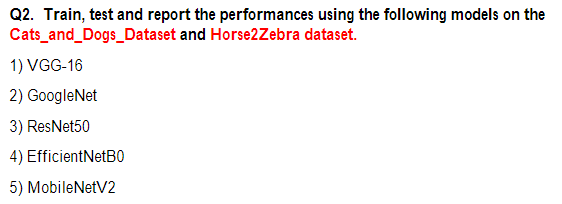

### Cats And Dogs Dataset

##### VGG-16

In [14]:
from keras.applications.vgg16 import VGG16
from keras.applications.inception_v3 import InceptionV3
from keras.applications.resnet_v2 import ResNet50V2
from keras.applications.efficientnet import EfficientNetB0
from keras.applications.mobilenet_v2 import MobileNetV2

def VGG_16(classes):
  base_model = VGG16(input_shape=(224,224,3), weights='imagenet', include_top=False)
  base_model.trainable = False #freeze the layers

  model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2048, activation='relu', name='HiddenLayer-1'),
    tf.keras.layers.Dense(classes, activation='softmax', name='OutputLayer')
  ])
  model.summary()

  model.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['accuracy'])
  return model

In [15]:
vgg16Model = VGG_16(classes = 2)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 HiddenLayer-1 (Dense)       (None, 2048)              51382272  
                                                                 
 OutputLayer (Dense)         (None, 2)                 4098      
                                                                 
Total params: 66,101,058
Trainable params: 51,386,370
Non-trainable params: 14,714,688
_________________________________________________________________


In [16]:
vgg16History = vgg16Model.fit(train_generator, epochs=5, validation_data=validation_generator, verbose=1)

Epoch 1/5
100/100 [==============================] - 22s 190ms/step - loss: 0.5121 - accuracy: 0.8265 - val_loss: 0.2333 - val_accuracy: 0.8930
Epoch 2/5
100/100 [==============================] - 20s 196ms/step - loss: 0.1428 - accuracy: 0.9430 - val_loss: 0.2166 - val_accuracy: 0.9180
Epoch 3/5
100/100 [==============================] - 21s 206ms/step - loss: 0.0727 - accuracy: 0.9745 - val_loss: 0.2464 - val_accuracy: 0.8980
Epoch 4/5
100/100 [==============================] - 20s 200ms/step - loss: 0.0288 - accuracy: 0.9955 - val_loss: 0.2224 - val_accuracy: 0.9080
Epoch 5/5
100/100 [==============================] - 20s 202ms/step - loss: 0.0136 - accuracy: 0.9995 - val_loss: 0.2373 - val_accuracy: 0.9080


##### GoogleNet

In [17]:
def GoogleNet(classes):
  base_model = InceptionV3(input_shape = (224,224,3), weights='imagenet', include_top=False)
  base_model.trainable = False
  model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2048, activation='relu', name='HiddenLayer-1'),
    tf.keras.layers.Dense(classes, activation='softmax', name='OutputLayer')
  ])

  model.summary()

  model.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['accuracy'])
  return model

In [18]:
googlenetModel = GoogleNet(classes = 2)

87924736/87910968 [==============================] - 1s 0us/step
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 flatten_1 (Flatten)         (None, 51200)             0         
                                                                 
 HiddenLayer-1 (Dense)       (None, 2048)              104859648 
                                                                 
 OutputLayer (Dense)         (None, 2)                 4098      
                                                                 
Total params: 126,666,530
Trainable params: 104,863,746
Non-trainable params: 21,802,784
_________________________________________________________________


In [19]:
googlenetHistory = googlenetModel.fit(train_generator, epochs=5, validation_data=validation_generator, verbose=1)

Epoch 1/5
100/100 [==============================] - 18s 138ms/step - loss: 0.5800 - accuracy: 0.9615 - val_loss: 1.2472 - val_accuracy: 0.9510
Epoch 2/5
100/100 [==============================] - 12s 120ms/step - loss: 0.1973 - accuracy: 0.9895 - val_loss: 0.3010 - val_accuracy: 0.9860
Epoch 3/5
100/100 [==============================] - 12s 121ms/step - loss: 0.0192 - accuracy: 0.9965 - val_loss: 0.5793 - val_accuracy: 0.9820
Epoch 4/5
100/100 [==============================] - 12s 119ms/step - loss: 0.0101 - accuracy: 0.9995 - val_loss: 0.2965 - val_accuracy: 0.9840
Epoch 5/5
100/100 [==============================] - 12s 119ms/step - loss: 3.2323e-04 - accuracy: 1.0000 - val_loss: 0.4944 - val_accuracy: 0.9840


##### ResNet50

In [20]:
def ResNet50(classes):
  base_model = ResNet50V2(input_shape = (224,224,3), weights='imagenet', include_top=False)
  base_model.trainable = False
  model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2048, activation='relu', name='HiddenLayer-1'),
    tf.keras.layers.Dense(classes, activation='softmax', name='OutputLayer')
  ])

  model.summary()

  model.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['accuracy'])
  return model

In [21]:
resnetModel = ResNet50(classes = 2)

94683136/94668760 [==============================] - 0s 0us/step
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 7, 7, 2048)        23564800  
                                                                 
 flatten_2 (Flatten)         (None, 100352)            0         
                                                                 
 HiddenLayer-1 (Dense)       (None, 2048)              205522944 
                                                                 
 OutputLayer (Dense)         (None, 2)                 4098      
                                                                 
Total params: 229,091,842
Trainable params: 205,527,042
Non-trainable params: 23,564,800
_________________________________________________________________


In [22]:
resnetHistory = resnetModel.fit(train_generator, epochs=5, validation_data=validation_generator, verbose=1)

Epoch 1/5
100/100 [==============================] - 19s 152ms/step - loss: 0.8498 - accuracy: 0.9565 - val_loss: 0.2505 - val_accuracy: 0.9770
Epoch 2/5
100/100 [==============================] - 14s 143ms/step - loss: 0.0823 - accuracy: 0.9910 - val_loss: 0.2941 - val_accuracy: 0.9770
Epoch 3/5
100/100 [==============================] - 15s 145ms/step - loss: 0.0214 - accuracy: 0.9955 - val_loss: 0.1904 - val_accuracy: 0.9810
Epoch 4/5
100/100 [==============================] - 15s 148ms/step - loss: 0.0239 - accuracy: 0.9970 - val_loss: 0.7128 - val_accuracy: 0.9690
Epoch 5/5
100/100 [==============================] - 14s 142ms/step - loss: 0.0247 - accuracy: 0.9955 - val_loss: 0.4342 - val_accuracy: 0.9730


##### EfficientNetB0

In [23]:
def EfficientNet(classes):
  base_model = EfficientNetB0(input_shape = (224,224,3), weights='imagenet', include_top=False)
  base_model.trainable = False
  model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2048, activation='relu', name='HiddenLayer-1'),
    tf.keras.layers.Dense(classes, activation='softmax', name='OutputLayer')
  ])

  model.summary()

  model.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['accuracy'])
  return model

In [24]:
efficientnetModel = EfficientNet(classes = 2)

16719872/16705208 [==============================] - 0s 0us/step
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 7, 7, 1280)       4049571   
                                                                 
 flatten_3 (Flatten)         (None, 62720)             0         
                                                                 
 HiddenLayer-1 (Dense)       (None, 2048)              128452608 
                                                                 
 OutputLayer (Dense)         (None, 2)                 4098      
                                                                 
Total params: 132,506,277
Trainable params: 128,456,706
Non-trainable params: 4,049,571
_________________________________________________________________


In [26]:
efficientnetHistory = efficientnetModel.fit(train_generator, epochs=5, validation_data=validation_generator, verbose=1)

Epoch 1/5
100/100 [==============================] - 12s 119ms/step - loss: 0.7549 - accuracy: 0.4990 - val_loss: 0.6986 - val_accuracy: 0.5000
Epoch 2/5
100/100 [==============================] - 13s 129ms/step - loss: 0.7857 - accuracy: 0.5100 - val_loss: 0.8587 - val_accuracy: 0.5000
Epoch 3/5
100/100 [==============================] - 12s 119ms/step - loss: 0.8510 - accuracy: 0.5040 - val_loss: 0.7104 - val_accuracy: 0.5000
Epoch 4/5
100/100 [==============================] - 12s 120ms/step - loss: 0.7544 - accuracy: 0.4940 - val_loss: 0.7036 - val_accuracy: 0.5000
Epoch 5/5
100/100 [==============================] - 12s 119ms/step - loss: 0.7805 - accuracy: 0.4935 - val_loss: 0.7208 - val_accuracy: 0.5000


##### MobileNetV2

In [27]:
def MobileNet(classes):
  base_model = MobileNetV2(input_shape = (224,224,3), weights='imagenet', include_top=False)
  base_model.trainable = False
  model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2048, activation='relu', name='HiddenLayer-1'),
    tf.keras.layers.Dense(classes, activation='softmax', name='OutputLayer')
  ])

  model.summary()

  model.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['accuracy'])
  return model

In [28]:
mobilenetModel = MobileNet(classes = 2)

9420800/9406464 [==============================] - 0s 0us/step
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten_4 (Flatten)         (None, 62720)             0         
                                                                 
 HiddenLayer-1 (Dense)       (None, 2048)              128452608 
                                                                 
 OutputLayer (Dense)         (None, 2)                 4098      
                                                                 
Total params: 130,714,690
Trainable params: 128,456,706
Non-trainable params: 2,257,984
_________________________________________________________________


In [29]:
mobilenetHistory = mobilenetModel.fit(train_generator, epochs=5, validation_data=validation_generator, verbose=1)

Epoch 1/5
100/100 [==============================] - 14s 120ms/step - loss: 0.6183 - accuracy: 0.9515 - val_loss: 0.2685 - val_accuracy: 0.9770
Epoch 2/5
100/100 [==============================] - 11s 113ms/step - loss: 0.2063 - accuracy: 0.9810 - val_loss: 0.2579 - val_accuracy: 0.9750
Epoch 3/5
100/100 [==============================] - 11s 113ms/step - loss: 0.0393 - accuracy: 0.9935 - val_loss: 0.3648 - val_accuracy: 0.9720
Epoch 4/5
100/100 [==============================] - 11s 112ms/step - loss: 0.0327 - accuracy: 0.9955 - val_loss: 0.3293 - val_accuracy: 0.9730
Epoch 5/5
100/100 [==============================] - 12s 123ms/step - loss: 0.0082 - accuracy: 0.9970 - val_loss: 0.3350 - val_accuracy: 0.9750


### Tabulation

In [30]:
required = {'Loss' : [alexnetHistory.history["loss"][-1], vgg16History.history["loss"][-1],googlenetHistory.history["loss"][-1], resnetHistory.history["loss"][-1], efficientnetHistory.history["loss"][-1], mobilenetHistory.history["loss"][-1]],
        'Accuracy' : [alexnetHistory.history["accuracy"][-1], vgg16History.history["accuracy"][-1],googlenetHistory.history["accuracy"][-1], resnetHistory.history["accuracy"][-1], efficientnetHistory.history["accuracy"][-1], mobilenetHistory.history["accuracy"][-1]], 
        'Validation Loss' : [alexnetHistory.history["val_loss"][-1], vgg16History.history["val_loss"][-1],googlenetHistory.history["val_loss"][-1], resnetHistory.history["val_loss"][-1], efficientnetHistory.history["val_loss"][-1], mobilenetHistory.history["val_loss"][-1]], 
        'Validation Accuracy' : [alexnetHistory.history["val_accuracy"][-1], vgg16History.history["val_accuracy"][-1],googlenetHistory.history["val_accuracy"][-1], resnetHistory.history["val_accuracy"][-1], efficientnetHistory.history["val_accuracy"][-1], mobilenetHistory.history["val_accuracy"][-1]]}
index = ['AlexNet', 'VGG16', 'GoogleNet', 'ResNet50', 'EfficientNetB0', 'MobileNetV2']
tabulation = pd.DataFrame(required, index=index)
tabulation.head(10)

,Loss,Accuracy,Validation Loss,Validation Accuracy
AlexNet,0.701681,0.6010,0.716997,0.581
VGG16,0.013557,0.9995,0.237324,0.908
GoogleNet,0.000323,1.0000,0.494428,0.984
ResNet50,0.024699,0.9955,0.434203,0.973
EfficientNetB0,0.780537,0.4935,0.720753,0.500
MobileNetV2,0.008169,0.9970,0.334971,0.975


## Dataset-2 : Horse2Zebra Dataset

##### Dataset Download

In [31]:
!wget --no-check-certificate \
    https://people.eecs.berkeley.edu/~taesung_park/CycleGAN/datasets/horse2zebra.zip \
    -O /tmp/horse2zebra.zip

--2022-08-28 18:29:53--  https://people.eecs.berkeley.edu/~taesung_park/CycleGAN/datasets/horse2zebra.zip
Resolving people.eecs.berkeley.edu (people.eecs.berkeley.edu)... 128.32.244.190
Connecting to people.eecs.berkeley.edu (people.eecs.berkeley.edu)|128.32.244.190|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 116867962 (111M) [application/zip]
Saving to: ‘/tmp/horse2zebra.zip’

/tmp/horse2zebra.zi 100%[===================>] 111.45M  16.1MB/s    in 8.0s    

2022-08-28 18:30:02 (13.9 MB/s) - ‘/tmp/horse2zebra.zip’ saved [116867962/116867962]



##### Exctraction

In [32]:
local_zip = '/tmp/horse2zebra.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [33]:
!mkdir -v /tmp/horse2zebra/train /tmp/horse2zebra/validation
!mv -v /tmp/horse2zebra/testA /tmp/horse2zebra/testB /tmp/horse2zebra/validation
!mv -v /tmp/horse2zebra/trainA /tmp/horse2zebra/trainB /tmp/horse2zebra/train

mkdir: created directory '/tmp/horse2zebra/train'
mkdir: created directory '/tmp/horse2zebra/validation'
renamed '/tmp/horse2zebra/testA' -> '/tmp/horse2zebra/validation/testA'
renamed '/tmp/horse2zebra/testB' -> '/tmp/horse2zebra/validation/testB'
renamed '/tmp/horse2zebra/trainA' -> '/tmp/horse2zebra/train/trainA'
renamed '/tmp/horse2zebra/trainB' -> '/tmp/horse2zebra/train/trainB'


##### Normalization

In [34]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

In [35]:
base_dir = '/tmp/horse2zebra'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_horse_dir = os.path.join(train_dir, 'trainA')

train_zebra_dir = os.path.join(train_dir, 'trainB')

validation_horse_dir = os.path.join(validation_dir, 'testA')

validation_zebra_dir = os.path.join(validation_dir, 'testB')

In [36]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(224, 224), 
        batch_size=20,
        class_mode='categorical')

Found 2401 images belonging to 2 classes.


In [37]:
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=20,
        class_mode='categorical')

Found 260 images belonging to 2 classes.


In [38]:
train_horse_fnames = os.listdir(train_horse_dir)
print(train_horse_fnames[:10])

train_zebra_fnames = os.listdir(train_zebra_dir)
print(train_zebra_fnames[:10])

['n02381460_4094.jpg', 'n02381460_1083.jpg', 'n02381460_525.jpg', 'n02381460_7689.jpg', 'n02381460_541.jpg', 'n02381460_8435.jpg', 'n02381460_1586.jpg', 'n02381460_314.jpg', 'n02381460_4783.jpg', 'n02381460_5408.jpg']
['n02391049_7434.jpg', 'n02391049_2057.jpg', 'n02391049_3085.jpg', 'n02391049_3075.jpg', 'n02391049_2098.jpg', 'n02391049_643.jpg', 'n02391049_1928.jpg', 'n02391049_3139.jpg', 'n02391049_2231.jpg', 'n02391049_5788.jpg']


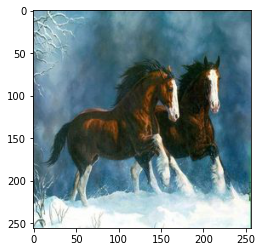

In [39]:
plt.imshow(mpimg.imread(os.path.join(train_horse_dir, train_horse_fnames[0])))

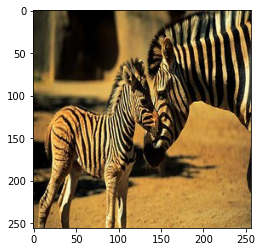

In [40]:
plt.imshow(mpimg.imread(os.path.join(train_zebra_dir, train_zebra_fnames[0])))

##### AlexNet

In [41]:
alexnetHistory2 = alexnetModel.fit(train_generator, epochs=5, validation_data=validation_generator, verbose=1)

Epoch 1/5
121/121 [==============================] - 8s 67ms/step - loss: 0.5835 - accuracy: 0.7018 - val_loss: 4.4035 - val_accuracy: 0.5385
Epoch 2/5
121/121 [==============================] - 8s 64ms/step - loss: 0.4150 - accuracy: 0.8180 - val_loss: 1.0190 - val_accuracy: 0.5692
Epoch 3/5
121/121 [==============================] - 8s 64ms/step - loss: 0.3513 - accuracy: 0.8551 - val_loss: 2.8430 - val_accuracy: 0.5923
Epoch 4/5
121/121 [==============================] - 9s 75ms/step - loss: 0.3174 - accuracy: 0.8726 - val_loss: 0.5484 - val_accuracy: 0.7500
Epoch 5/5
121/121 [==============================] - 8s 65ms/step - loss: 0.3102 - accuracy: 0.8776 - val_loss: 2.1827 - val_accuracy: 0.5962


##### VGG-16

In [42]:
vgg16History2 = vgg16Model.fit(train_generator, epochs=5, validation_data=validation_generator, verbose=1)

Epoch 1/5
121/121 [==============================] - 19s 156ms/step - loss: 0.3119 - accuracy: 0.8946 - val_loss: 0.0972 - val_accuracy: 0.9654
Epoch 2/5
121/121 [==============================] - 18s 147ms/step - loss: 0.0775 - accuracy: 0.9688 - val_loss: 0.0934 - val_accuracy: 0.9731
Epoch 3/5
121/121 [==============================] - 18s 149ms/step - loss: 0.0360 - accuracy: 0.9900 - val_loss: 0.0910 - val_accuracy: 0.9654
Epoch 4/5
121/121 [==============================] - 18s 151ms/step - loss: 0.0222 - accuracy: 0.9954 - val_loss: 0.1166 - val_accuracy: 0.9654
Epoch 5/5
121/121 [==============================] - 18s 150ms/step - loss: 0.0136 - accuracy: 0.9971 - val_loss: 0.0956 - val_accuracy: 0.9808


##### GoogleNet

In [43]:
googlenetHistory2 = googlenetModel.fit(train_generator, epochs=5, validation_data=validation_generator, verbose=1)

Epoch 1/5
121/121 [==============================] - 11s 86ms/step - loss: 0.6598 - accuracy: 0.9671 - val_loss: 0.1518 - val_accuracy: 0.9769
Epoch 2/5
121/121 [==============================] - 10s 80ms/step - loss: 0.0302 - accuracy: 0.9938 - val_loss: 0.0824 - val_accuracy: 0.9808
Epoch 3/5
121/121 [==============================] - 11s 88ms/step - loss: 0.0018 - accuracy: 0.9996 - val_loss: 0.0864 - val_accuracy: 0.9885
Epoch 4/5
121/121 [==============================] - 10s 81ms/step - loss: 2.5428e-04 - accuracy: 1.0000 - val_loss: 0.0943 - val_accuracy: 0.9846
Epoch 5/5
121/121 [==============================] - 10s 81ms/step - loss: 1.8950e-04 - accuracy: 1.0000 - val_loss: 0.0903 - val_accuracy: 0.9885


##### ResNet50

In [44]:
resnetHistory2 = resnetModel.fit(train_generator, epochs=5, validation_data=validation_generator, verbose=1)

Epoch 1/5
121/121 [==============================] - 14s 116ms/step - loss: 0.8588 - accuracy: 0.9517 - val_loss: 0.4243 - val_accuracy: 0.9808
Epoch 2/5
121/121 [==============================] - 13s 111ms/step - loss: 0.0465 - accuracy: 0.9900 - val_loss: 0.2198 - val_accuracy: 0.9885
Epoch 3/5
121/121 [==============================] - 13s 110ms/step - loss: 0.0040 - accuracy: 0.9983 - val_loss: 0.3190 - val_accuracy: 0.9846
Epoch 4/5
121/121 [==============================] - 13s 110ms/step - loss: 5.6560e-04 - accuracy: 0.9996 - val_loss: 0.3452 - val_accuracy: 0.9846
Epoch 5/5
121/121 [==============================] - 13s 111ms/step - loss: 8.8656e-06 - accuracy: 1.0000 - val_loss: 0.3347 - val_accuracy: 0.9846


##### EfficientNetB0

In [45]:
efficientnetHistory2 = efficientnetModel.fit(train_generator, epochs=5, validation_data=validation_generator, verbose=1)

Epoch 1/5
121/121 [==============================] - 10s 82ms/step - loss: 0.7652 - accuracy: 0.5144 - val_loss: 0.8003 - val_accuracy: 0.4615
Epoch 2/5
121/121 [==============================] - 10s 78ms/step - loss: 0.7412 - accuracy: 0.5419 - val_loss: 0.8992 - val_accuracy: 0.4615
Epoch 3/5
121/121 [==============================] - 10s 79ms/step - loss: 0.7429 - accuracy: 0.5523 - val_loss: 0.6618 - val_accuracy: 0.7385
Epoch 4/5
121/121 [==============================] - 10s 79ms/step - loss: 0.7572 - accuracy: 0.5552 - val_loss: 0.6604 - val_accuracy: 0.6269
Epoch 5/5
121/121 [==============================] - 10s 78ms/step - loss: 0.7149 - accuracy: 0.5660 - val_loss: 0.6769 - val_accuracy: 0.5192


##### MobileNetV2

In [46]:
mobilenetHistory2 = mobilenetModel.fit(train_generator, epochs=5, validation_data=validation_generator, verbose=1)

Epoch 1/5
121/121 [==============================] - 9s 73ms/step - loss: 0.5260 - accuracy: 0.9625 - val_loss: 0.1140 - val_accuracy: 0.9846
Epoch 2/5
121/121 [==============================] - 9s 72ms/step - loss: 0.0154 - accuracy: 0.9963 - val_loss: 0.1289 - val_accuracy: 0.9846
Epoch 3/5
121/121 [==============================] - 9s 72ms/step - loss: 0.0012 - accuracy: 0.9996 - val_loss: 0.1692 - val_accuracy: 0.9846
Epoch 4/5
121/121 [==============================] - 9s 72ms/step - loss: 7.0109e-05 - accuracy: 1.0000 - val_loss: 0.1634 - val_accuracy: 0.9846
Epoch 5/5
121/121 [==============================] - 9s 70ms/step - loss: 3.2300e-05 - accuracy: 1.0000 - val_loss: 0.1622 - val_accuracy: 0.9846


### Tabulation

In [47]:
required2 = {'Loss' : [alexnetHistory2.history["loss"][-1], vgg16History2.history["loss"][-1],googlenetHistory2.history["loss"][-1], resnetHistory2.history["loss"][-1], efficientnetHistory2.history["loss"][-1], mobilenetHistory2.history["loss"][-1]],
        'Accuracy' : [alexnetHistory2.history["accuracy"][-1], vgg16History2.history["accuracy"][-1],googlenetHistory2.history["accuracy"][-1], resnetHistory2.history["accuracy"][-1], efficientnetHistory2.history["accuracy"][-1], mobilenetHistory2.history["accuracy"][-1]], 
        'Validation Loss' : [alexnetHistory2.history["val_loss"][-1], vgg16History2.history["val_loss"][-1],googlenetHistory2.history["val_loss"][-1], resnetHistory2.history["val_loss"][-1], efficientnetHistory2.history["val_loss"][-1], mobilenetHistory2.history["val_loss"][-1]], 
        'Validation Accuracy' : [alexnetHistory2.history["val_accuracy"][-1], vgg16History2.history["val_accuracy"][-1],googlenetHistory2.history["val_accuracy"][-1], resnetHistory2.history["val_accuracy"][-1], efficientnetHistory2.history["val_accuracy"][-1], mobilenetHistory2.history["val_accuracy"][-1]]}
index = ['AlexNet', 'VGG16', 'GoogleNet', 'ResNet50', 'EfficientNetB0', 'MobileNetV2']
tabulation2 = pd.DataFrame(required2, index=index)
tabulation2.head(10)

,Loss,Accuracy,Validation Loss,Validation Accuracy
AlexNet,0.310212,0.877551,2.182732,0.596154
VGG16,0.013640,0.997085,0.095595,0.980769
GoogleNet,0.000189,1.000000,0.090298,0.988462
ResNet50,0.000009,1.000000,0.334707,0.984615
EfficientNetB0,0.714863,0.566014,0.676923,0.519231
MobileNetV2,0.000032,1.000000,0.162154,0.984615
